In [ ]:

%load_ext autoreload
%autoreload 2

!pip install --upgrade pip
!pip install git+https://github.com/cqels/vision.git --force

from IPython.display import clear_output
clear_output(wait=True)

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
D:\Anaconda\python.exe -m pip install --upgrade pip


  Cloning https://github.com/cqels/vision.git to c:\users\lenovo\appdata\local\temp\pip-req-build-9ru5wgza
  Resolved https://github.com/cqels/vision.git to commit bd7a70032bab3096f7706d51ba2cd4a84dc510d5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached pyreadline3-3.5.4-py3-none-any.whl.metadata (4.7 kB)
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached p

  Running command git clone --filter=blob:none --quiet https://github.com/cqels/vision.git 'C:\Users\Lenovo\AppData\Local\Temp\pip-req-build-9ru5wgza'


In [ ]:
# import SemkgAPI
from vision_utils import semkg_api, data
from skimage import io
import matplotlib.pyplot as plt
from torch_model_zoo import utils

query_string='''# Give me 100 images contain Cat and Dog with its annotations.
PREFIX cv:<http://vision.semkg.org/onto/v0.1/>
PREFIX schema:<http://schema.org/>
PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>
SELECT ?datasetName (STR(?_imageName) AS ?imageName) ?imageUrl (xsd:integer(?_imageWidth) AS ?imageWidth) (xsd:integer(?_imageHeight) AS ?imageHeight) ?labelName ?bbCentreX ?bbCentreY ?bbWidth ?bbHeight
WHERE {
  {
    SELECT ?image
    WHERE{
      ?image cv:hasAnnotation ?annotation1.
      ?annotation1 a cv:ObjectDetectionAnnotation.
      ?annotation1 cv:hasLabel ?label1.
      ?label1 cv:label "cat".

      ?image cv:hasAnnotation ?annotation2.
      ?annotation2 a cv:ObjectDetectionAnnotation.
      ?annotation2 cv:hasLabel ?label2.
      ?label2 cv:label "dog".

      ?image schema:isPartOf / schema:name ?datasetName .
      FILTER regex(?datasetName, "coco2017", "i")
    }
    GROUP BY ?image
    LIMIT 100
  }
  ?image schema:isPartOf / schema:name ?datasetName .
  ?image schema:name ?_imageName.
  OPTIONAL{?image schema:contentUrl ?imageUrl}.
  ?image cv:hasAnnotation ?annotation.
  ?image cv:imgWidth ?_imageWidth.
  ?image cv:imgHeight ?_imageHeight.
  ?annotation cv:hasLabel/cv:label ?labelName.
  ?annotation cv:hasBox ?bbox.
  ?bbox cv:boxHeight ?bbHeight.
  ?bbox cv:boxWidth ?bbWidth.
  ?bbox cv:centerX ?bbCentreX.
  ?bbox cv:centerY ?bbCentreY.
}
'''

#Query and return result
result=semkg_api.query(query_string)
result = utils.visionkg2cocoDet(result)

print(result)

{'images': [{'id': 1, 'file_name': '000000169076.jpg', 'dataset': 'coco2017_det_val', 'height': 612, 'width': 612, 'url': 'http://images.cocodataset.org/val2017/000000169076.jpg', 'image_path': 'data\\image_dataset\\coco\\000000169076.jpg'}, {'id': 2, 'file_name': '000000219578.jpg', 'dataset': 'coco2017_det_val', 'height': 427, 'width': 640, 'url': 'http://images.cocodataset.org/val2017/000000219578.jpg', 'image_path': 'data\\image_dataset\\coco\\000000219578.jpg'}, {'id': 3, 'file_name': '000000022892.jpg', 'dataset': 'coco2017_det_val', 'height': 334, 'width': 500, 'url': 'http://images.cocodataset.org/val2017/000000022892.jpg', 'image_path': 'data\\image_dataset\\coco\\000000022892.jpg'}, {'id': 4, 'file_name': '000000241326.jpg', 'dataset': 'coco2017_det_val', 'height': 375, 'width': 500, 'url': 'http://images.cocodataset.org/val2017/000000241326.jpg', 'image_path': 'data\\image_dataset\\coco\\000000241326.jpg'}, {'id': 5, 'file_name': '000000318238.jpg', 'dataset': 'coco2017_det_

In [10]:
!source /content/py310/bin/activate && python --version
# reinstall pytorch
!source /content/py310/bin/activate && python -m pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu121
# clone the toolbox for object detection
!git clone https://github.com/open-mmlab/mmdetection.git

# install dependencies
%cd mmdetection/
!source /content/py310/bin/activate && python -m pip install -r requirements.txt
!source /content/py310/bin/activate && python -m pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html
!source /content/py310/bin/activate && python setup.py develop

from IPython.display import clear_output
clear_output(wait=True)

'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


d:\Git_programms\assignment1-y2m2-obj-det\mmdetection


Cloning into 'mmdetection'...
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [7]:
!source /content/py310/bin/activate && python --version
from os.path import join as opj
from shutil import copy
from torch_model_zoo import utils
from mmdetection_configs  import configs_fcos_visionKG

import types, sys
imp = types.ModuleType("imp")
imp.reload = lambda module: importlib.reload(module)
import importlib
sys.modules["imp"] = imp

%load_ext autoreload
%autoreload 2
%aimport -torch

path_to_anno_mixedDatasets = opj('data/mixedDatasets/','test_query_api_image.json')
filter_cat_nms = ['cat', 'dog']
params = utils.prepare_for_training(path_to_anno_mixedDatasets, result, existed_data=False, filter_cat_nms=filter_cat_nms)
path_to_config = 'configs/fcos/fcos_visionKG.py'
path_to_work_dir = 'mixedDatasets/logs_visionKG/'
#copy(configs_fcos_visionKG.__file__, path_to_config)
nms_categories = params['CAT_NMS']
num_categories = len(nms_categories)

'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


Filtering the categories which are not in the given category names:  ['cat', 'dog']
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


100%|██████████| 100/100 [01:05<00:00,  1.52it/s]
2025-11-06 17:16:01 LAPTOP-PNMA1UP6 root[44820] INFO 
All the needed images have been downloaded to: d:\Git_programms\assignment1-y2m2-obj-det\assignment1-y2m2-obj-det\data\image_dataset\coco

2025-11-06 17:16:01 LAPTOP-PNMA1UP6 root[44820] INFO 
Categories and Instances in the d:\Git_programms\assignment1-y2m2-obj-det\assignment1-y2m2-obj-det\data\mixedDatasets\train.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    cat     | 72           |    dog     | 70           |
|            |              |            |              |
|   total    | 142          |            |              |
2025-11-06 17:16:01 LAPTOP-PNMA1UP6 root[44820] INFO 
Categories and Instances in the d:\Git_programms\assignment1-y2m2-obj-det\assignment1-y2m2-obj-det\data\mixedDatasets\val.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:

SETTED PARAMS:
IMGS_PATH  :  data/image_dataset/coco
TRAIN_ANNO  :  data/mixedDatasets/train.json
TEST_ANNO  :  data/mixedDatasets/val.json
MODEL  :  retinanet_resnet50_fpn
WEIGHT_PTH  :  save_model/final.pth
OUTPUT_DIR  :  save_model
BATCH_SIZE  :  4
LEARNING_RATE  :  0.005
EPOCHS  :  6
NUM_CAT  :  2
TEST_ONLY  :  False
SETUP_SEED  :  65375
START_EPOCH  :  0
CAT_NMS  :  ['cat', 'dog']
Params which may need to be reset manually: 
IMGS_PATH: path to your images 
TRAIN_ANNO: path to your training annotations 
TEST_ANNO: path to your test annotations 
NUM_CAT: number of categories your would like to train 
CAT_NMS: name of each category


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


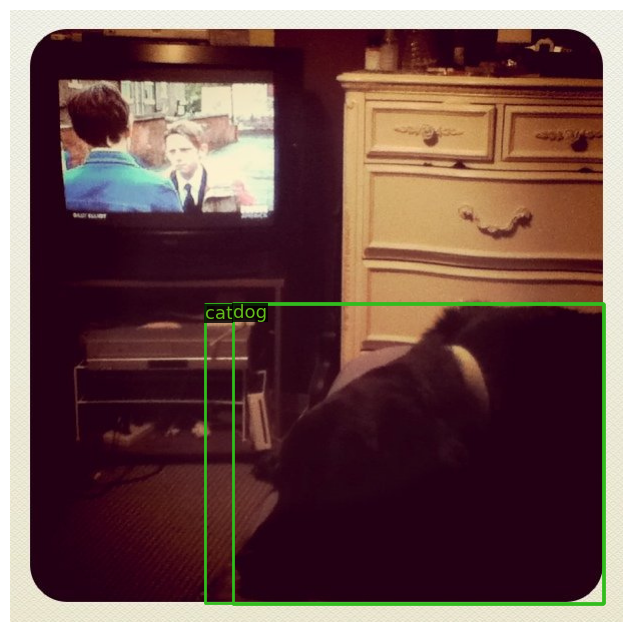

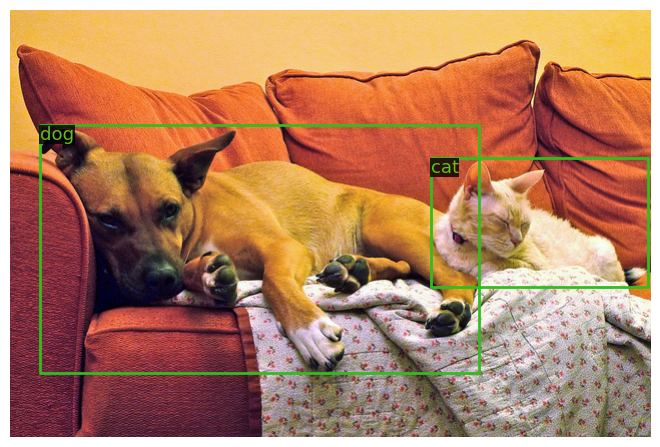

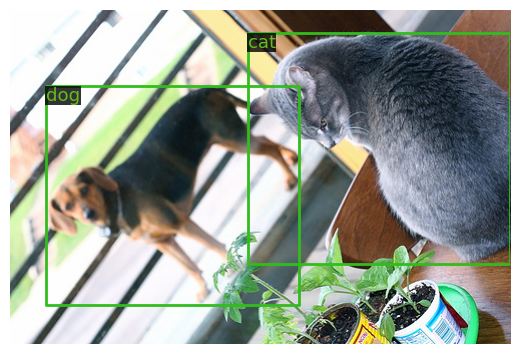

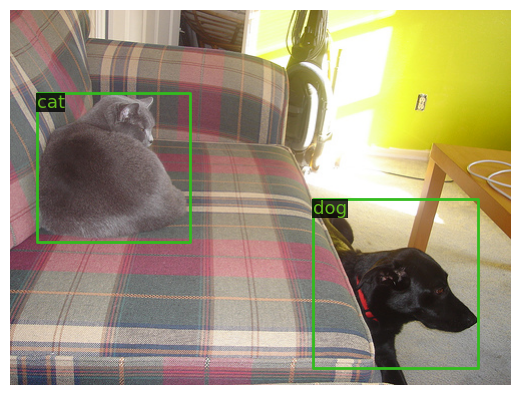

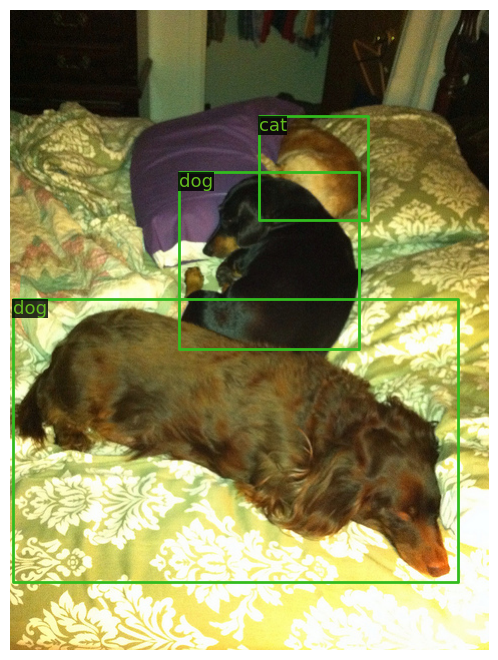

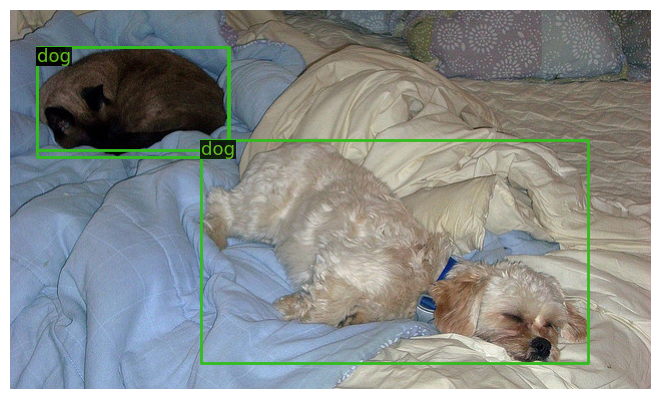

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


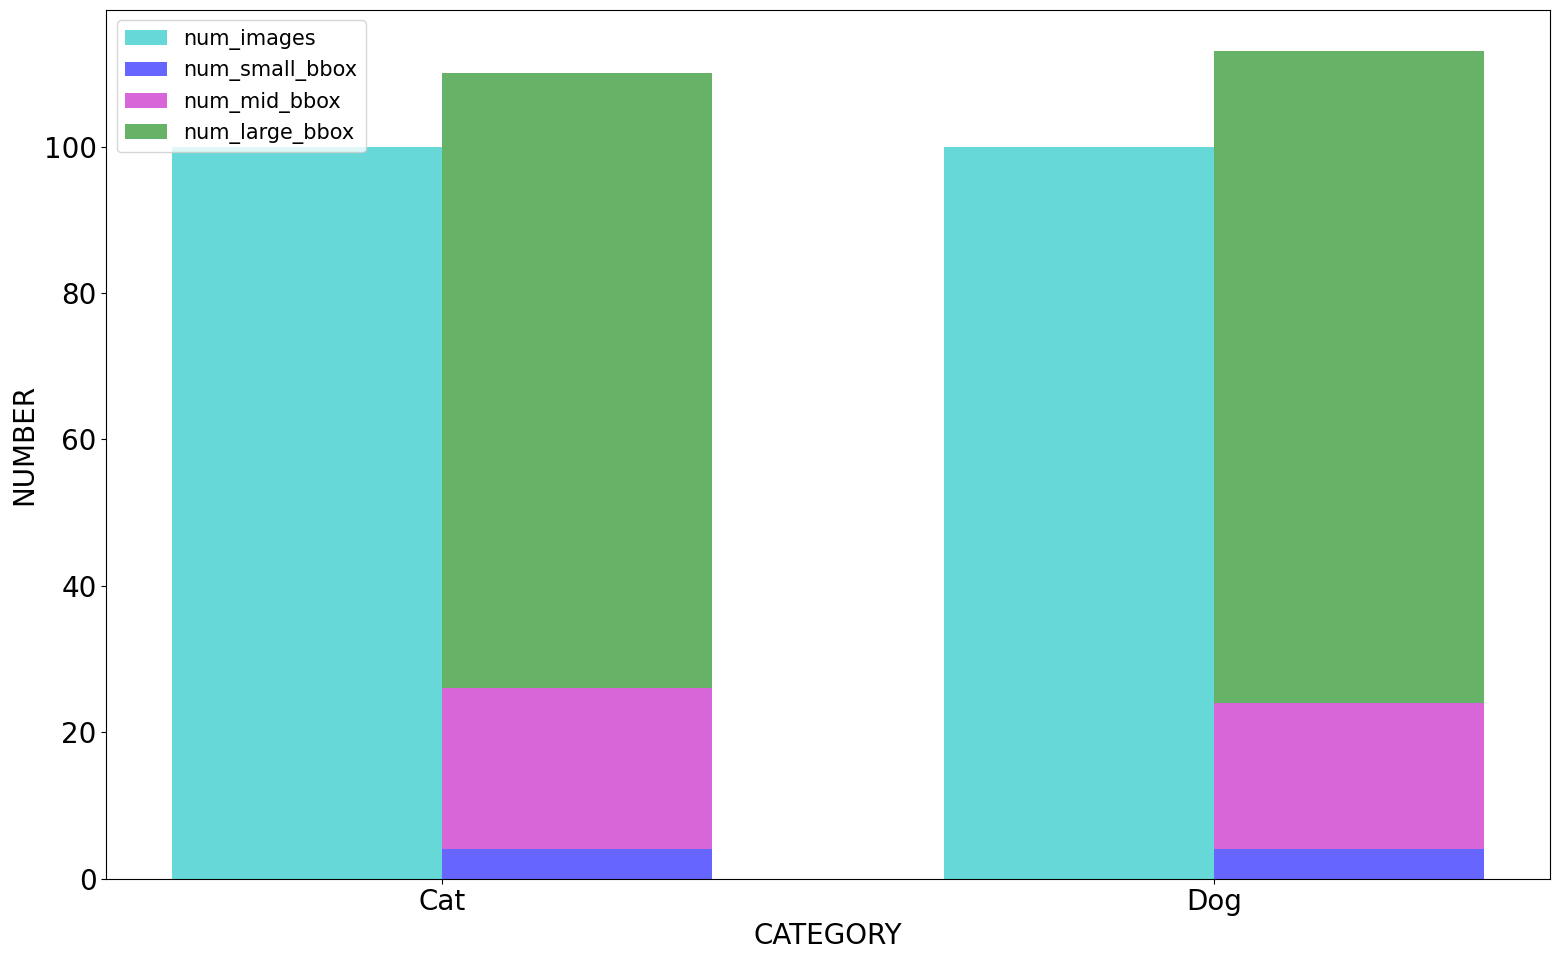

In [8]:
!source /content/py310/bin/activate && python --version
if num_categories > 4:
  cat_nms = nms_categories[0:4]
else:
  cat_nms = nms_categories
utils.show_annotation(path_to_anno_mixedDatasets, cat_nms, show_num=6)
utils.show_cat_distribution(path_to_anno_mixedDatasets, cat_nms)

In [5]:
!source /content/py310/bin/activate && pip install "numpy<2" --force-reinstall
!source /content/py310/bin/activate && pip install matplotlib
!source /content/py310/bin/activate && python -c "import matplotlib; matplotlib.use('Agg'); import matplotlib.pyplot as plt; print('✅ Matplotlib backend set to Agg')"
import os
os.environ['PYTHONIOENCODING'] = 'utf-8'
# Training based on the queried MixedDataset
# For more params-setting, please check:
# https://mmdetection.readthedocs.io/en/latest/
# !source /content/py310/bin/activate && python tools/train.py {path_to_config} \
# --cfg-options model.bbox_head.num_classes={num_categories} \
# train_dataloader.dataset.metainfo.classes="$nms_categories" val_dataloader.dataset.metainfo.classes="$nms_categories"

!unset MPLBACKEND && source /content/py310/bin/activate && python tools/train.py {path_to_config} \
  --cfg-options model.bbox_head.num_classes={num_categories} \
  train_dataloader.dataset.metainfo.classes="$nms_categories" \
  val_dataloader.dataset.metainfo.classes="$nms_categories"

'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'source' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'unset' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
